In [12]:
import pandas as pd
df = pd.read_csv("extracted_features_selected.csv")

In [13]:
# --- Train-Test Split & Feature Scaling---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and labels
X = df.drop("emotion", axis=1)
y = df["emotion"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# --- SVM ---
# --- Extended Hyperparameter grid ---
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Smaller parameter grid for faster testing
param_grid = {
    'C': [0.1, 1, 10],                  # Regularization strength
    'gamma': ['scale', 0.01, 0.1],      # Only for RBF kernel
    'kernel': ['linear', 'rbf']         # Linear and RBF kernels
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

# Evaluate on the test set
y_pred_best = grid.predict(X_test_scaled)

results_best = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best, average='weighted'),
    "Recall": recall_score(y_test, y_pred_best, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_best, average='weighted')
}

print("Test set evaluation with best parameters:")
print(results_best)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy: 0.5902653867871259
Test set evaluation with best parameters:
{'Accuracy': 0.5833333333333334, 'Precision': np.float64(0.6054216687897244), 'Recall': np.float64(0.5833333333333334), 'F1-score': np.float64(0.5901413234642401)}


In [15]:
# --- SVM Modeling---
svm_rbf = SVC(kernel='rbf',  
              C=10,
              gamma=0.01,
              random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# --- Evaluation ---
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-score": f1_score(y_true, y_pred, average='weighted')
    }

results = pd.DataFrame({
    "RBF SVM": evaluate_model(y_test, y_pred_rbf)
}).T

print(results)

         Accuracy  Precision    Recall  F1-score
RBF SVM  0.565972   0.585929  0.565972  0.572311


In [16]:
# --- Logistic Regression--
# --- Extended Hyperparameter grid ---
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l2'],                       # 'l2' works with lbfgs and multinomial
    'solver': ['lbfgs', 'saga'],             # solvers that support multinomial
    'multi_class': ['multinomial'],          # multi-class strategy
    'class_weight': [None, 'balanced']       # handle class imbalance
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

# Best hyperparameters and cross-validated accuracy
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

# Evaluate on test set
y_pred_best = grid.predict(X_test_scaled)

results_best = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best, average='weighted'),
    "Recall": recall_score(y_test, y_pred_best, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_best, average='weighted')
}

print("Test set evaluation with best parameters:")
print(results_best)

Best parameters: {'C': 1, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.5338565782044042
Test set evaluation with best parameters:
{'Accuracy': 0.5138888888888888, 'Precision': np.float64(0.5306519787542704), 'Recall': np.float64(0.5138888888888888), 'F1-score': np.float64(0.5145427554449732)}


C:\Users\Krystal Bacalso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
# --- Logistic Regression Modeling---
logreg = LogisticRegression(
    C=1,
    class_weight=None,
    multi_class='multinomial',
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred_lr = logreg.predict(X_test_scaled)

# --- Evaluation ---
def evaluate_model(y_true, y_pred_lr):
    return {
        "Accuracy": accuracy_score(y_true, y_pred_lr),
        "Precision": precision_score(y_true, y_pred_lr, average='weighted'),
        "Recall": recall_score(y_true, y_pred_lr, average='weighted'),
        "F1-score": f1_score(y_true, y_pred_lr, average='weighted')
    }

results_logreg = pd.DataFrame({
    "Logistic Regression": evaluate_model(y_test, y_pred_lr)
}).T

print("Evaluation Table for Logistic Regression:")
print(results_logreg)

Evaluation Table for Logistic Regression:
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.506944   0.508836  0.506944  0.506175


C:\Users\Krystal Bacalso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
# --- Model Comparison ---
def evaluate_model(y_true, y_pred_lr):
    return {
        "Accuracy": accuracy_score(y_true, y_pred_lr),
        "Precision": precision_score(y_true, y_pred_lr, average='weighted'),
        "Recall": recall_score(y_true, y_pred_lr, average='weighted'),
        "F1-score": f1_score(y_true, y_pred_lr, average='weighted')
    }

results_logreg = pd.DataFrame({
    "Logistic Regression": evaluate_model(y_test, y_pred_lr),
    "RBF SVM": evaluate_model(y_test, y_pred_rbf)
}).T

print("Evaluation Table for Logistic Regression:")
print(results_logreg)

Evaluation Table for Logistic Regression:
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.506944   0.508836  0.506944  0.506175
RBF SVM              0.565972   0.585929  0.565972  0.572311


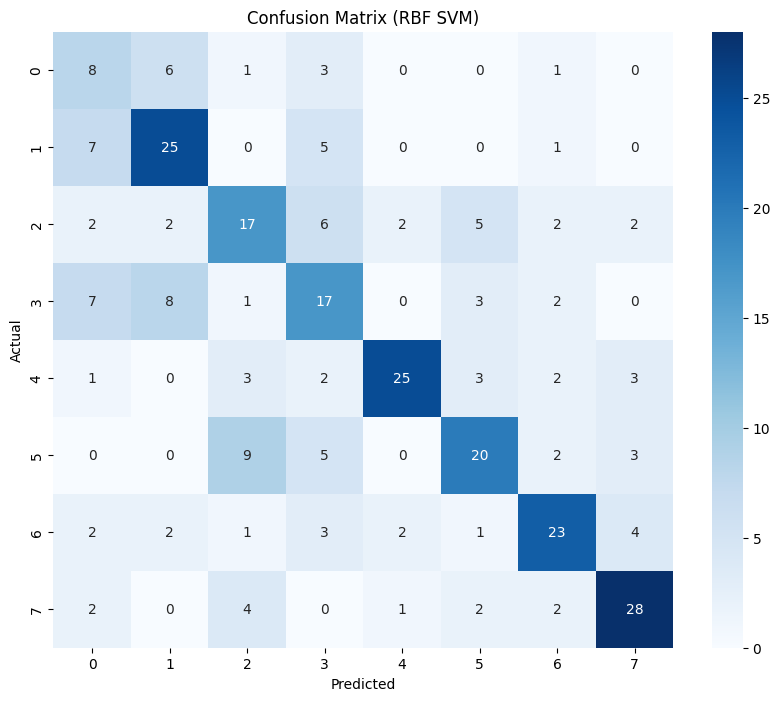

In [19]:
# --- Confusion Matrix for RBF SVM---
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rbf)  
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (RBF SVM)")
plt.show()

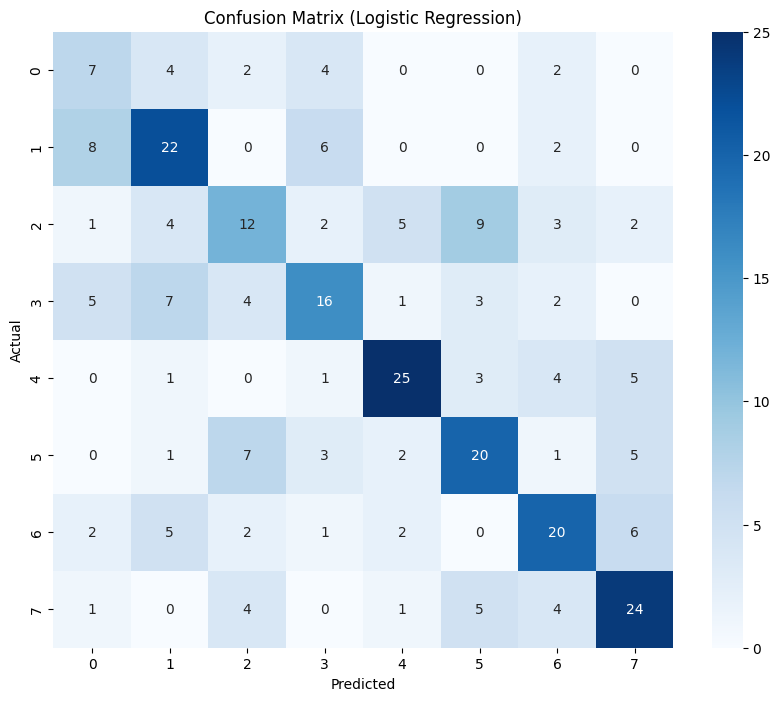

In [20]:
# --- Confusion Matrix for Logistic Regression---
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lr) 
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

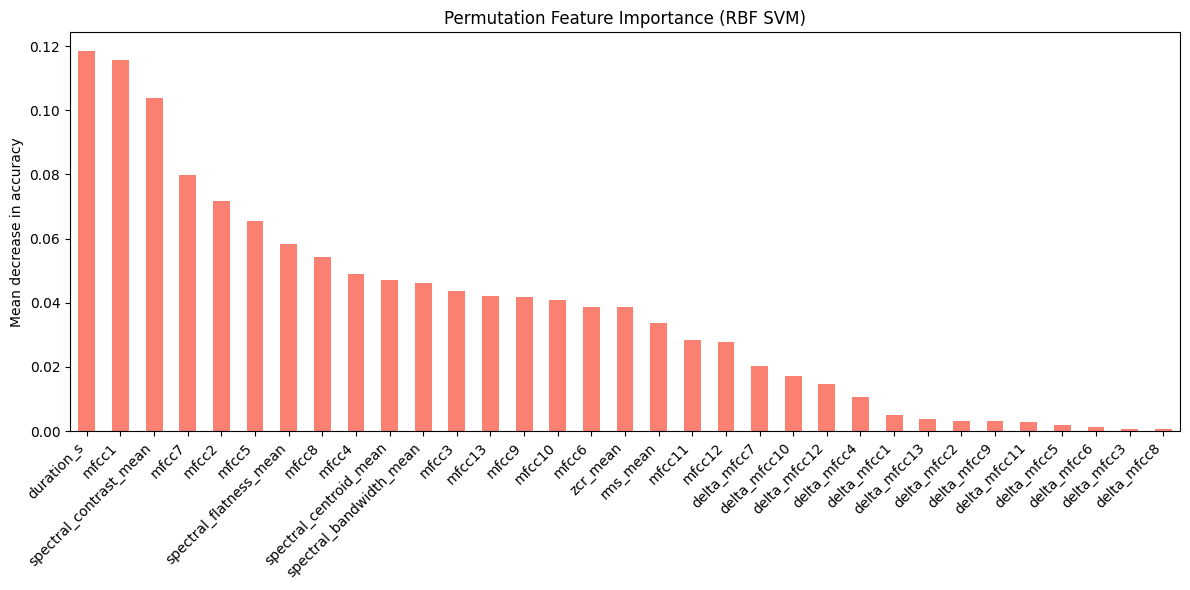

In [21]:
# --- Feature Importance using Permutation Importance for RBF SVM---
from sklearn.inspection import permutation_importance

# Assuming svm_rbf is your trained RBF SVM
result = permutation_importance(svm_rbf, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Convert to DataFrame
import pandas as pd
feature_importance = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar', color='salmon')
plt.title("Permutation Feature Importance (RBF SVM)")
plt.ylabel("Mean decrease in accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

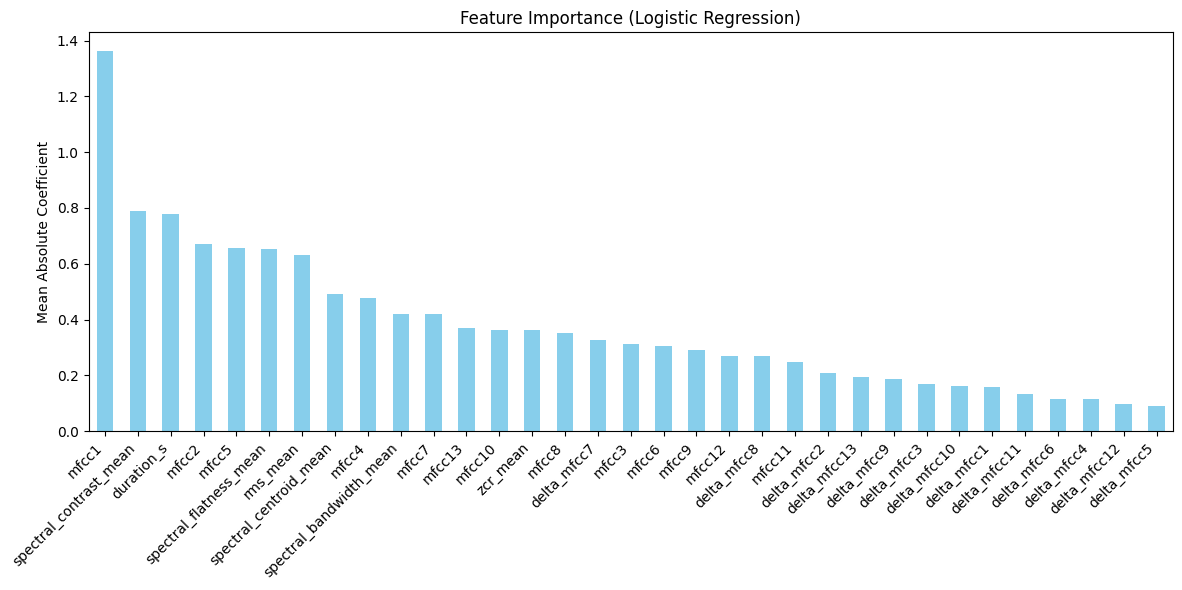

In [22]:
# --- Feature Importance using Permutation Importance for RBF SVM---
import matplotlib.pyplot as plt
import pandas as pd

# Get the best Logistic Regression estimator from GridSearchCV
logreg = grid.best_estimator_

# Coefficients for each class (n_classes x n_features)
coefs = logreg.coef_

# Column names
feature_names = X_train.columns

# Create a DataFrame for readability
coef_df = pd.DataFrame(coefs, columns=feature_names)
coef_df.index = logreg.classes_  # class labels

# Compute mean absolute coefficient across all classes
feature_importance = coef_df.abs().mean(axis=0).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Logistic Regression)")
plt.ylabel("Mean Absolute Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
